In [13]:
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

from VPU import OpenVINOHandler
from craterdetection.deepmoon import template_match_t

exp = OpenVINOHandler('DeepMoon', device='MYRIAD')

sd_input_images = np.load('blobs/sd_input_images.npy').transpose(0, 3, 1, 2)
sd_target_masks = np.load('blobs/sd_target_masks.npy')
exp

OpenVINOHandler(device=MYRIAD, input_layout=NCHW, input_shape=(1, 1, 256, 256))

In [16]:
%%time
batch = sd_input_images[0:10]
targets = sd_target_masks[0:10]
out = exp.infer(batch)

Wall time: 9.86 s


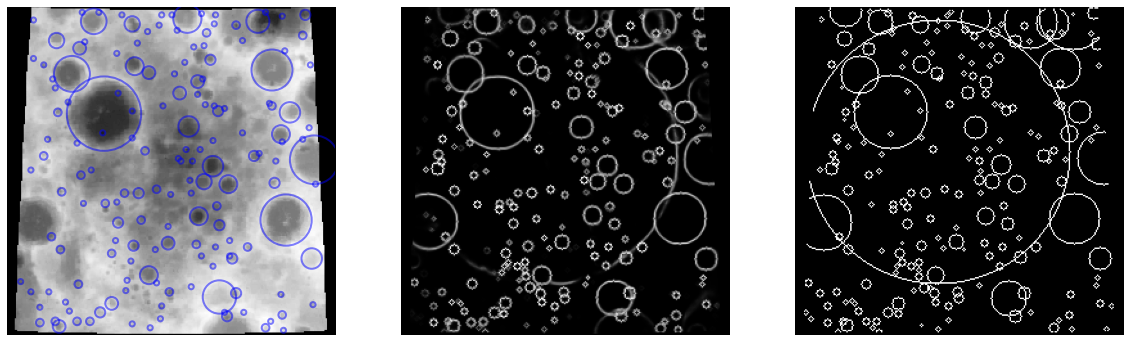

In [23]:
i = 2

extracted_rings = template_match_t(out[i, 0].copy(), minrad=2.5)

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(batch[i, 0], cmap='Greys_r')
axes[0].axis('off')
axes[1].imshow(out[i, 0], cmap='Greys_r')
axes[1].axis('off')
axes[2].imshow(targets[i], cmap='Greys_r')
axes[2].axis('off')

for x, y, r in extracted_rings:
    circle = plt.Circle((x, y), r, color='blue', fill=False, linewidth=2, alpha=0.5)
    axes[0].add_artist(circle)

(-0.5, 255.5, 255.5, -0.5)

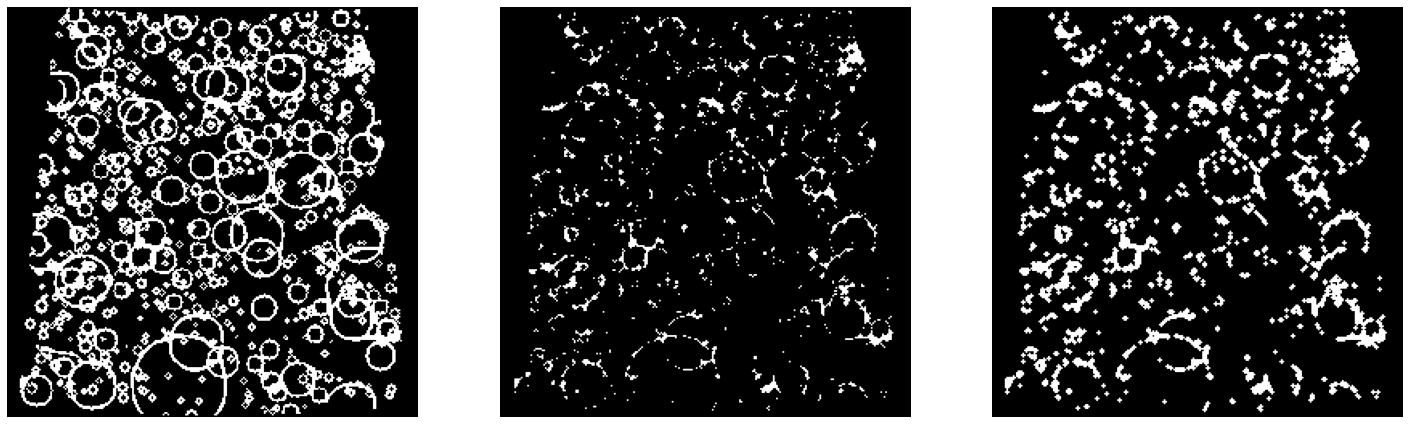

In [5]:
# erosion_type = cv2.MORPH_RECT
# erosion_type = cv2.MORPH_CROSS
# erosion_type = cv2.MORPH_ELLIPSE
    
erosion_size = 0
max_elem = 2
max_kernel_size = 21

def erosion(src, erosion_type, erosion_size):
    element = cv2.getStructuringElement(erosion_type, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
    erosion_dst = cv2.erode(src, element)
    return erosion_dst
    
def dilatation(src, dilatation_type, dilatation_size):
    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
    dilatation_dst = cv2.dilate(src, element)
    return dilatation_dst

src = out[0, 0].copy()

fig, axes = plt.subplots(1,3, figsize=(25,10))

ret, src = cv2.threshold(src, 0.2, 1, cv2.THRESH_BINARY)

axes[0].imshow(src, cmap='Greys_r')
axes[0].axis('off')

src = erosion(src, cv2.MORPH_ELLIPSE, 1)
axes[1].imshow(src, cmap='Greys_r')
axes[1].axis('off')

src = dilatation(src, cv2.MORPH_ELLIPSE, 1)
axes[2].imshow(src, cmap='Greys_r')
axes[2].axis('off')

(100, 256, 256, 1)